In [31]:
library(tidyverse)

In [32]:
train <- read_csv('train.csv')
test <- read_csv('test.csv')

Rows: 1460 Columns: 81
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1459 Columns: 80
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (37): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
data <- bind_rows(train, test)

In [41]:
str(data)

spc_tbl_ [2,919 × 81] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id           : num [1:2919] 1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : num [1:2919] 60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr [1:2919] "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : num [1:2919] 65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : num [1:2919] 8450 9600 11250 9550 14260 ...
 $ Street       : chr [1:2919] "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr [1:2919] NA NA NA NA ...
 $ LotShape     : chr [1:2919] "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr [1:2919] "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr [1:2919] "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr [1:2919] "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr [1:2919] "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr [1:2919] "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr [1:2919] "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr [1:2919] "Norm" "Norm" "Norm" "Norm" ...
 $ Bld

In [46]:
# Create a summary data frame
summary_df <- data %>%
  summary() %>%
  as.data.frame()

# Display the transposed summary data frame
summary_df

Var1,Var2,Freq
<fct>,<fct>,<chr>
,Id,Min. : 1.0
,Id,1st Qu.: 730.5
,Id,Median :1460.0
,Id,Mean :1460.0
,Id,3rd Qu.:2189.5
,Id,Max. :2919.0
,Id,NA
,MSSubClass,Min. : 20.00
,MSSubClass,1st Qu.: 20.00


In [35]:
library(ggplot2)

Warning message:
“Removed 1459 rows containing non-finite values (stat_bin).”


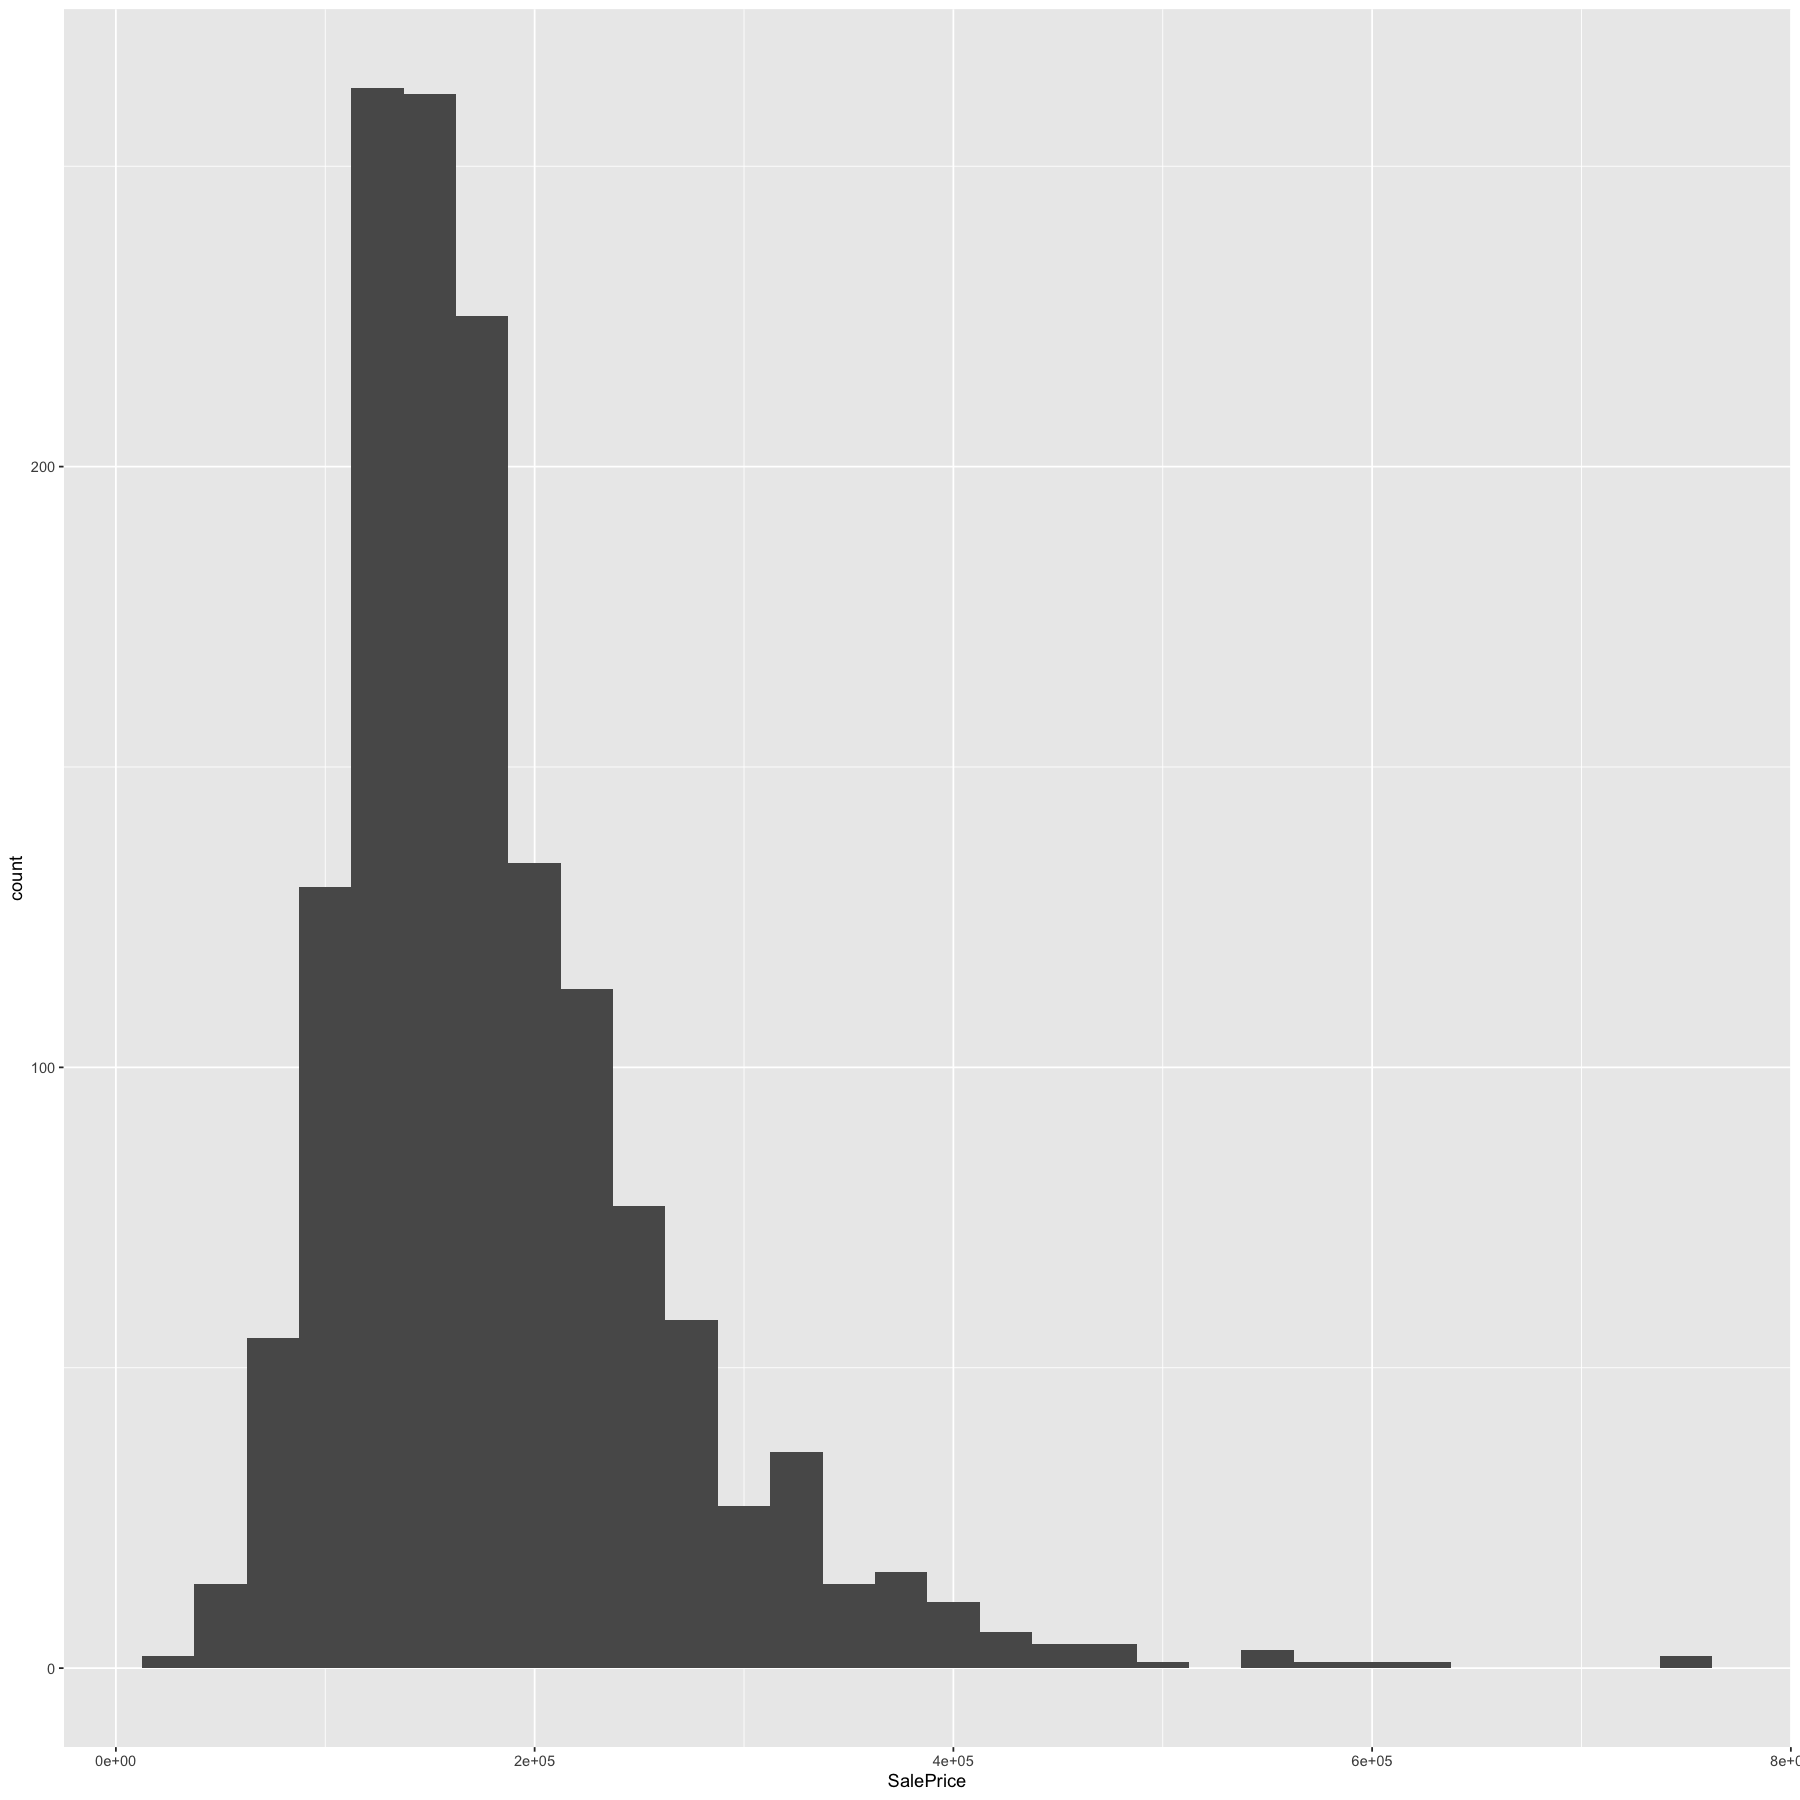

In [36]:
ggplot(data, aes(x = SalePrice)) +
  geom_histogram(binwidth = 25000)

In [37]:
numeric_data <- data %>%
  select_if(is.numeric)

In [50]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [38]:
data_long <- numeric_data %>%
  gather(key = "variable", value = "value") %>%
  drop_na(value)

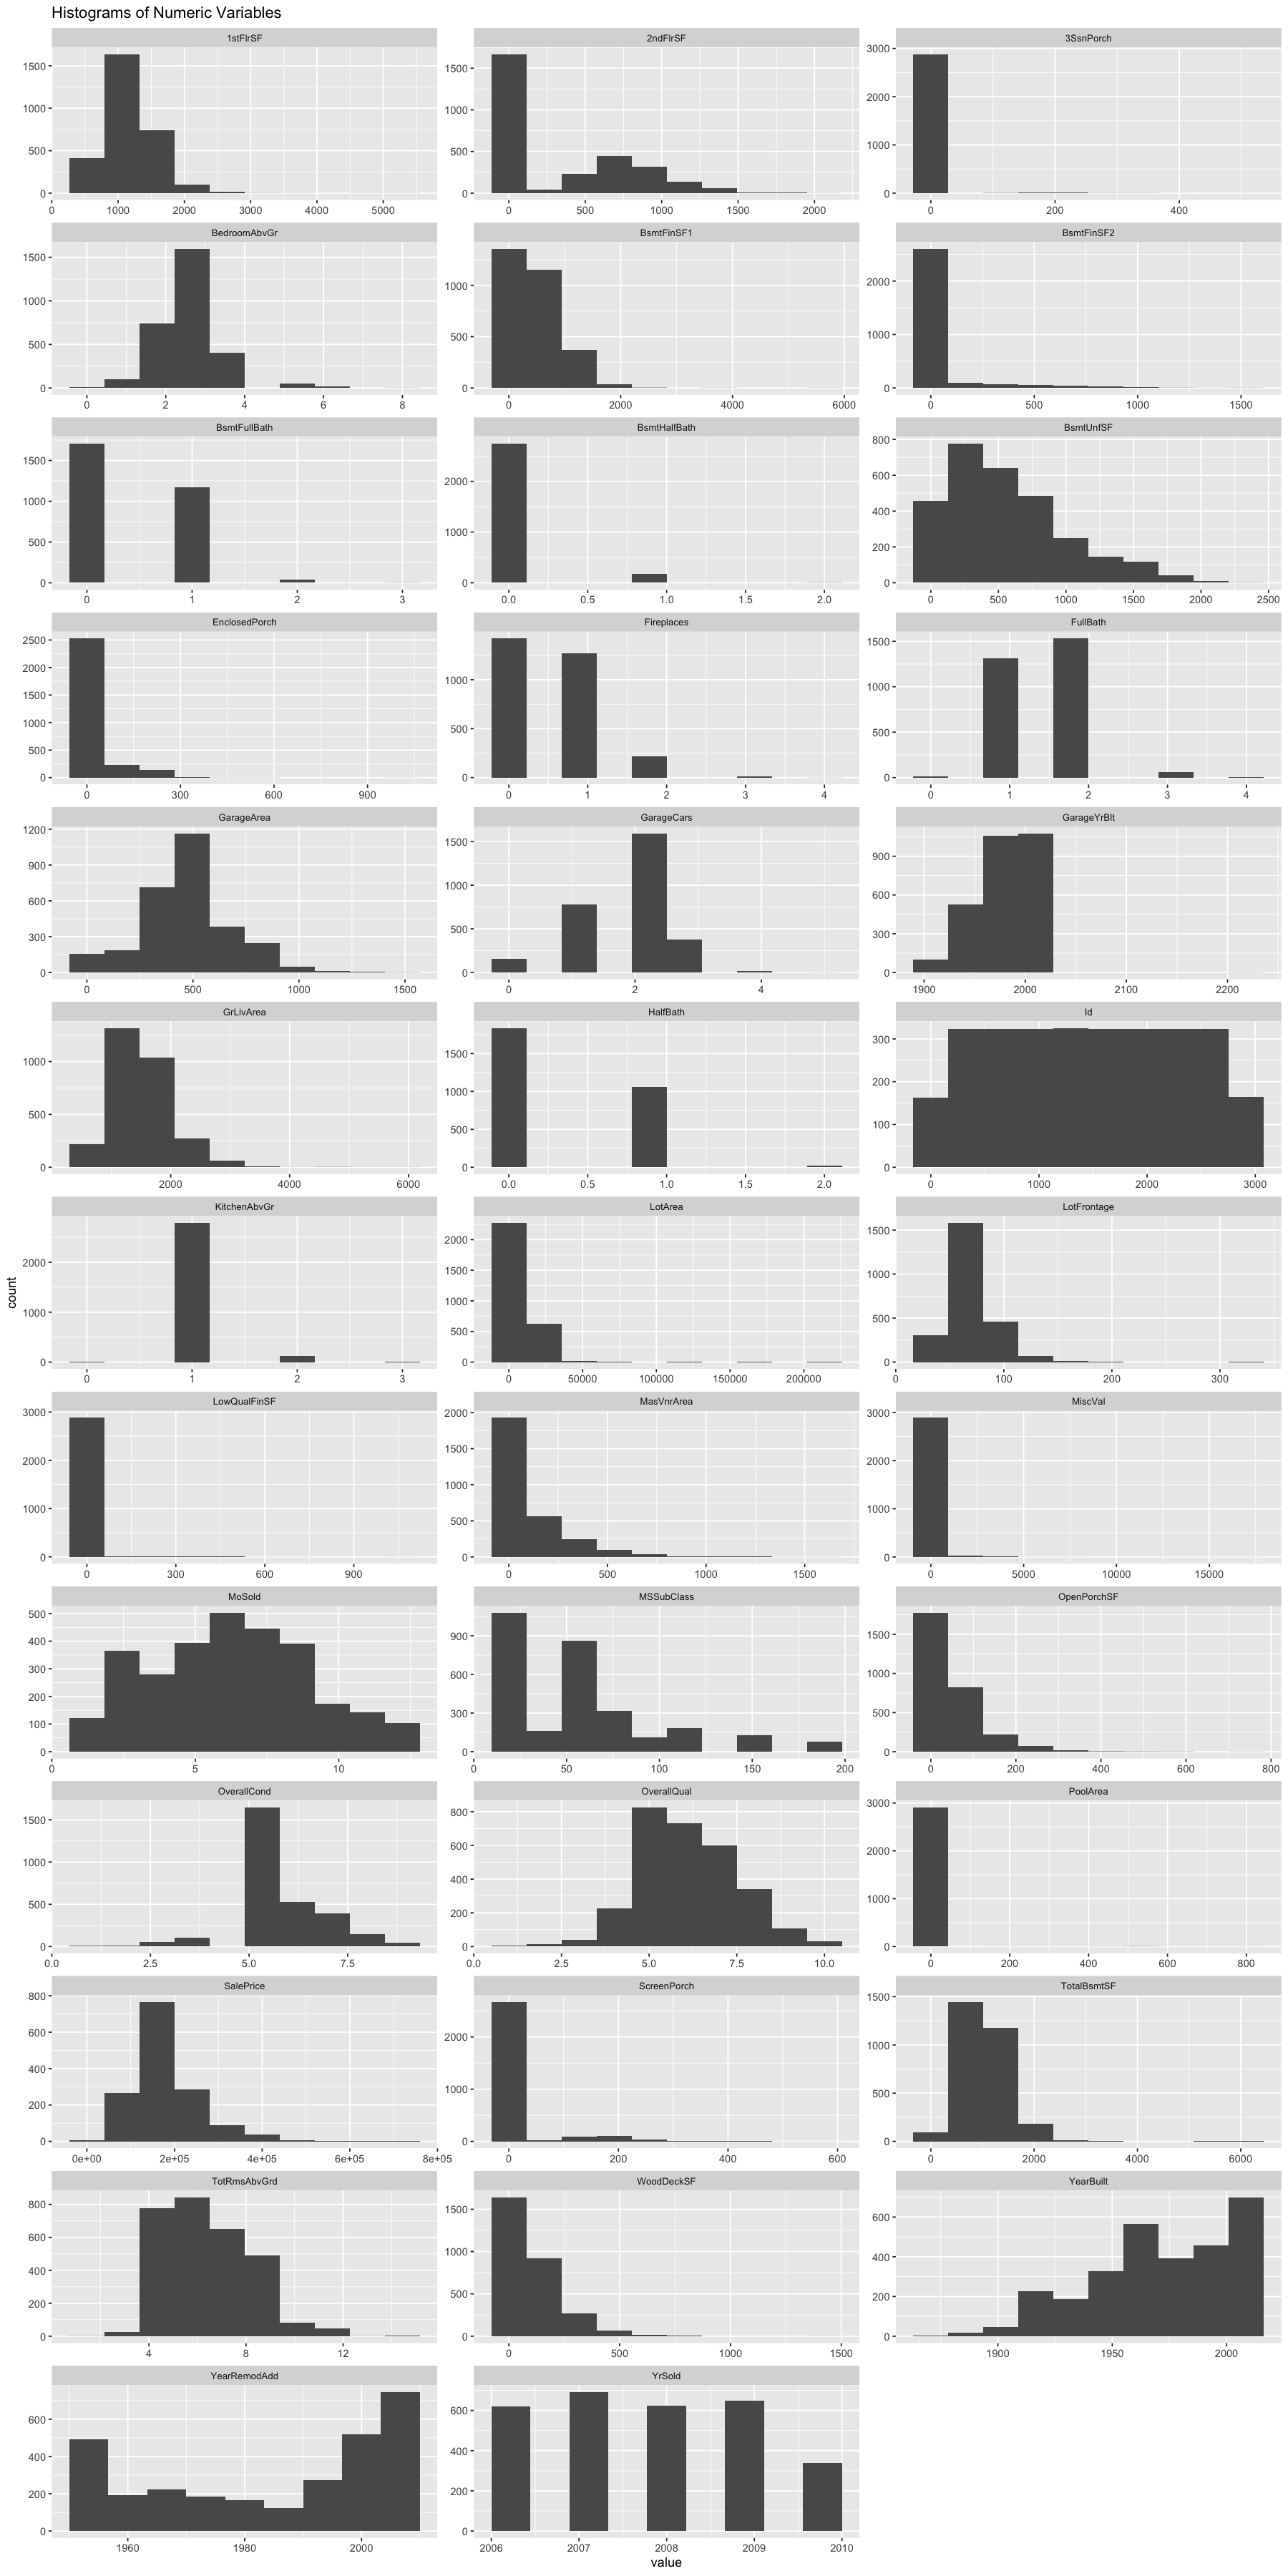

In [47]:
plot <- ggplot(data_long, aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~ variable, scales = "free", ncol = 3) +
  theme(strip.text.x = element_text(size = 8)) +
  ggtitle("Histograms of Numeric Variables")

options(repr.plot.width = 15, repr.plot.height = 30)

print(plot)

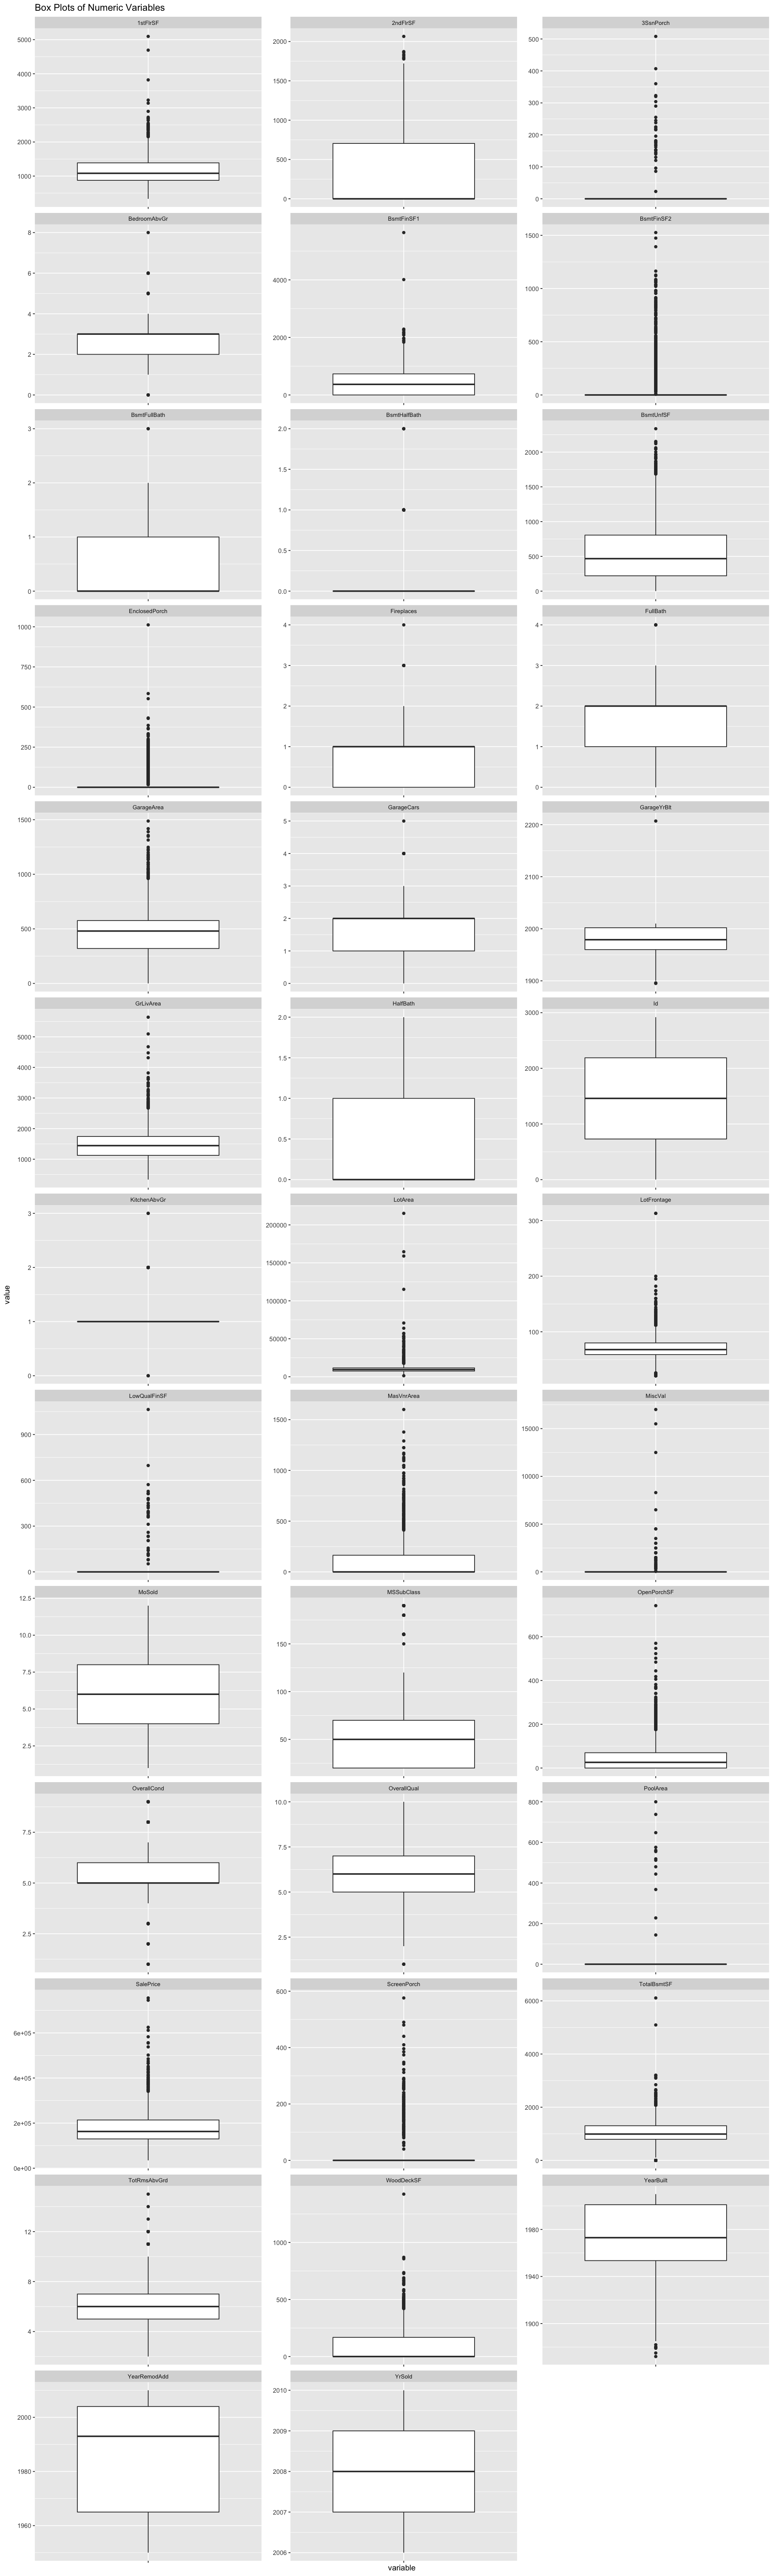

In [49]:
plot <- ggplot(data_long, aes(x = variable, y = value)) +
  geom_boxplot() +
  facet_wrap(~ variable, scales = "free", ncol = 3) +
  theme(strip.text.x = element_text(size = 8),
        axis.text.x = element_blank()) +
  ggtitle("Box Plots of Numeric Variables")

# Increase the plot size
options(repr.plot.width = 15, repr.plot.height = 50)

# Print the plot
print(plot)